In [1]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt


In [2]:
label_size = 12

# Set default font to computer roman
# plt.style.use('seaborn') # I personally prefer seaborn for the graph style, but you may choose whichever you want.
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Helvetica"],
          "font.size" : label_size,
          "legend.title_fontsize": label_size,
          "legend.fontsize": label_size,
          "legend.labelspacing": 0.25,}
plt.rcParams.update(params)

In [3]:
def plot_mod_comparison(data, score_type, plot_name, xlabs=True):
    plt.figure()
    g = sb.barplot(
        x = "name", y = score_type, data = data, palette="viridis",
        order=["lasso.norm", "norm", "pmm", "cart", "rf", "mmsbm"],
        errwidth=2, ci=99.999, capsize=.1
    )
    if xlabs:
        g.set(xticklabels=["LASSO", "BLR", "PMM", "CART", "RF", "SBM"])
    else:
        g.set(xticklabels=[])
    plt.xlabel("")
    plt.ylabel("")
    plt.grid(False)
    g.xaxis.set_tick_params(length=0)
    plt.yticks(fontsize=14, color="black")

    # Increase the size of x labels
    plt.xticks(fontsize=16)  # You can replace 'x-large' with a specific number to control the size

    # Move x labels a bit lower
    for item in g.get_xticklabels():
        item.set_position([item.get_position()[0], item.get_position()[1] - 0.05])

    # Hide the right and top spines
    g.spines[['right', 'top']].set_visible(False)
    g.get_figure().savefig(f"plots/{plot_name}_{score_type}.png", dpi=300, format="png")

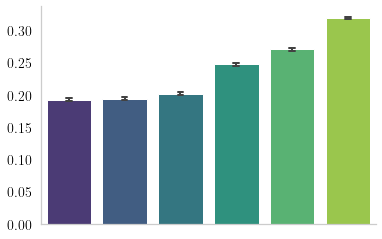

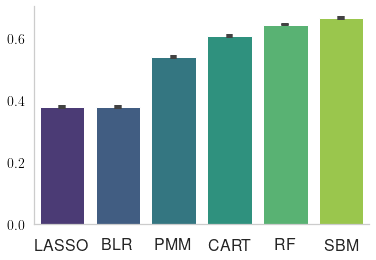

In [5]:
import seaborn as sns

sns.set(font_scale=1.4, style="whitegrid")
mm = pd.read_csv("output/missing_pred_40.csv").drop(
    "Unnamed: 0", axis=1
).assign(name = "mmsbm").rename(
    columns = {"grade": "iteration", "mean": "correct", "sd": "one_off"}
)
ot = pd.read_csv("output/missing_models_40.csv")
tt = pd.concat([ot, mm], axis=0)
plot_mod_comparison(tt, "correct", "missings_40", xlabs=False)
plot_mod_comparison(tt, "one_off", "missings_40", xlabs=True)

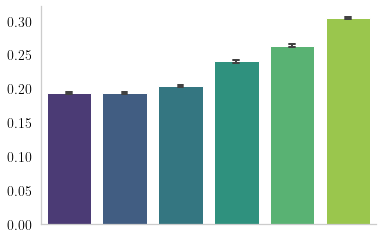

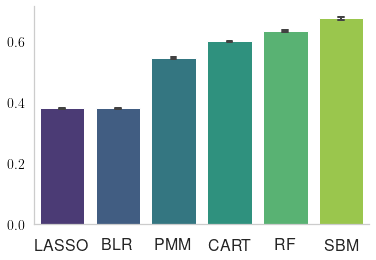

In [6]:
mm = pd.read_csv("output/missing_pred_60.csv").drop(
    "Unnamed: 0", axis=1
).assign(name = "mmsbm").rename(
    columns = {"grade": "iteration", "mean": "correct", "sd": "one_off"}
)
ot = pd.read_csv("output/missing_models_60.csv")
tt = pd.concat([ot, mm], axis=0)
plot_mod_comparison(tt, "correct", "missings_60", xlabs=False)
plot_mod_comparison(tt, "one_off", "missings_60", xlabs=True)
# 8c8c8cd4

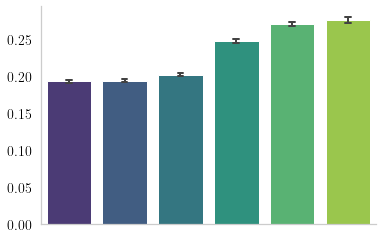

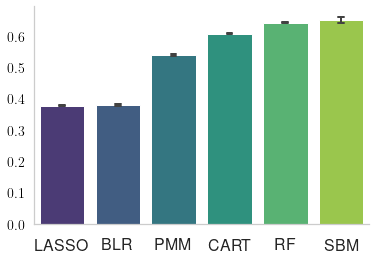

In [7]:
mm = pd.read_csv("output/missing_pred_80.csv").drop(
    "Unnamed: 0", axis=1
).assign(name = "mmsbm").rename(
    columns = {"grade": "iteration", "mean": "correct", "sd": "one_off"}
)
ot = pd.read_csv("output/missing_models_40.csv")
tt = pd.concat([ot, mm])
plot_mod_comparison(tt, "correct", "missings_80", xlabs=False)
plot_mod_comparison(tt, "one_off", "missings_80", xlabs=True)